In [9]:
import sys
sys.path.append("..")
from plots import *
import numpy as np
import pandas as pd
from datetime import timedelta

# load stock data
data = pd.read_csv('stock_data.csv', header=[
                   0, 1], index_col=0, parse_dates=True)
daily_returns = (data['Close'] / data['Close'].shift(1) - 1)[1:]

TEST_YEARS = 0
TRAIN_END_DATE = data.index.max() - timedelta(days=TEST_YEARS * 365)

train = daily_returns[(daily_returns.index < TRAIN_END_DATE)].fillna(0)
test = daily_returns[(daily_returns.index >= TRAIN_END_DATE)].fillna(0)

compare_files = [
    '../.data/3000_331iter.json',
    # '../.data/3000_355iter.json',
    # '../.data/3000_362iter.json',
    # '../.data/3000_opt_374iter.json',
    # '../.data/3000_opt_416iter.json',
    '../.data/3000_opt_468iter.json',
    # '../.data/3000_opt2_387iter.json',
    '../.data/3000_opt2_411iter.json',
    # '../.data/3000_opt2_456iter.json',
]

stats_lst, solutions_lst = zip(*[read_log(file) for file in compare_files])

labels = ['nsga-ii', 'select_opt', 'select_opt+dyn_mut+dyn_pop']
args = {
    'solutions_lst': solutions_lst,
    'train': train,
    'labels': labels
}

traces = read_traces()


==========nsga-ii=============


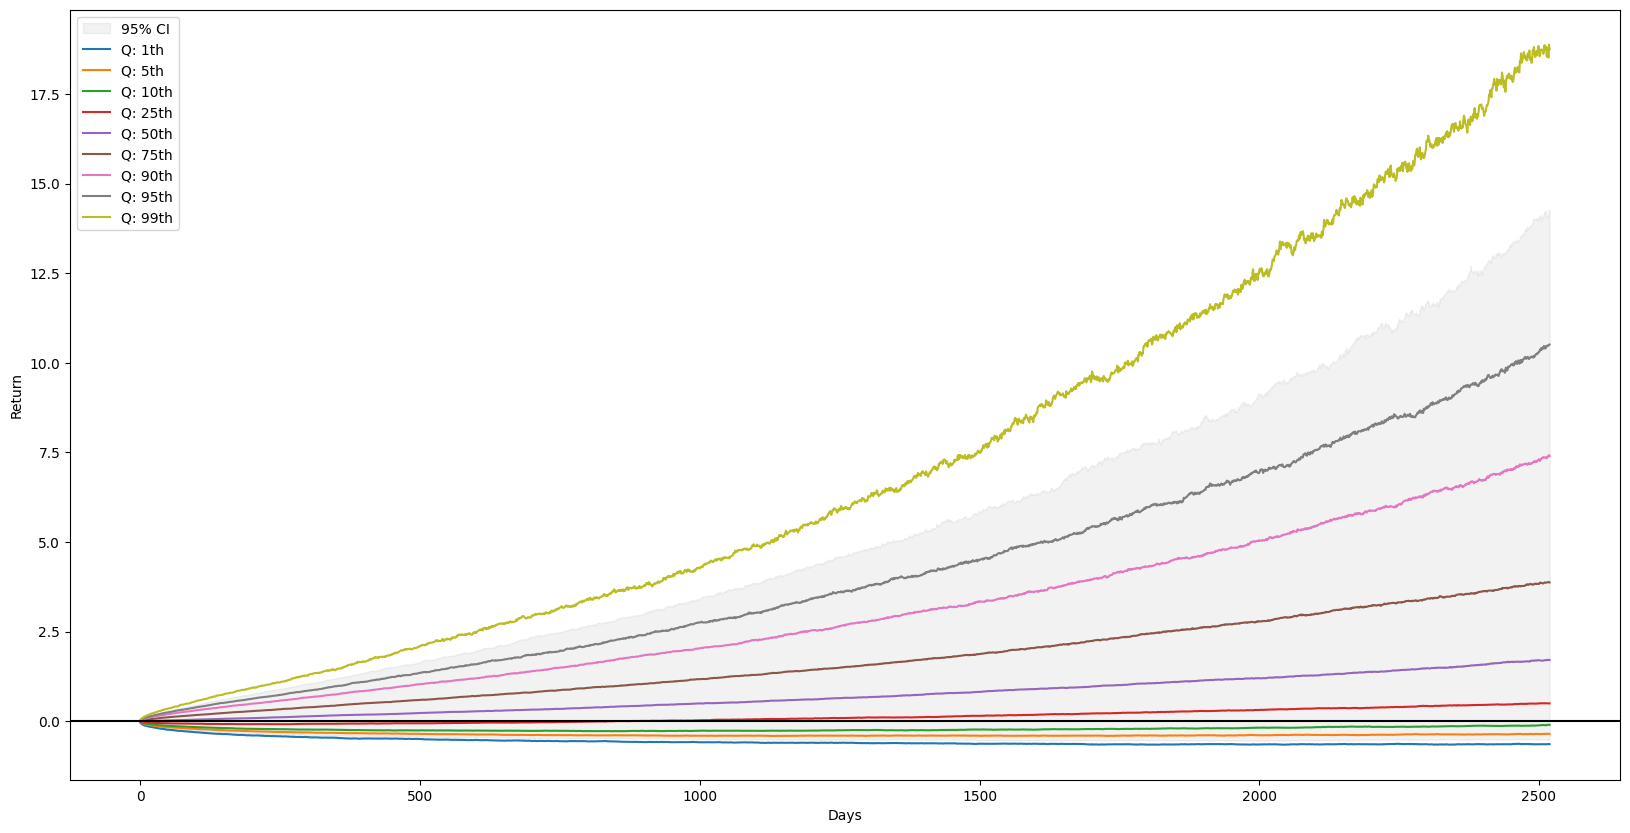

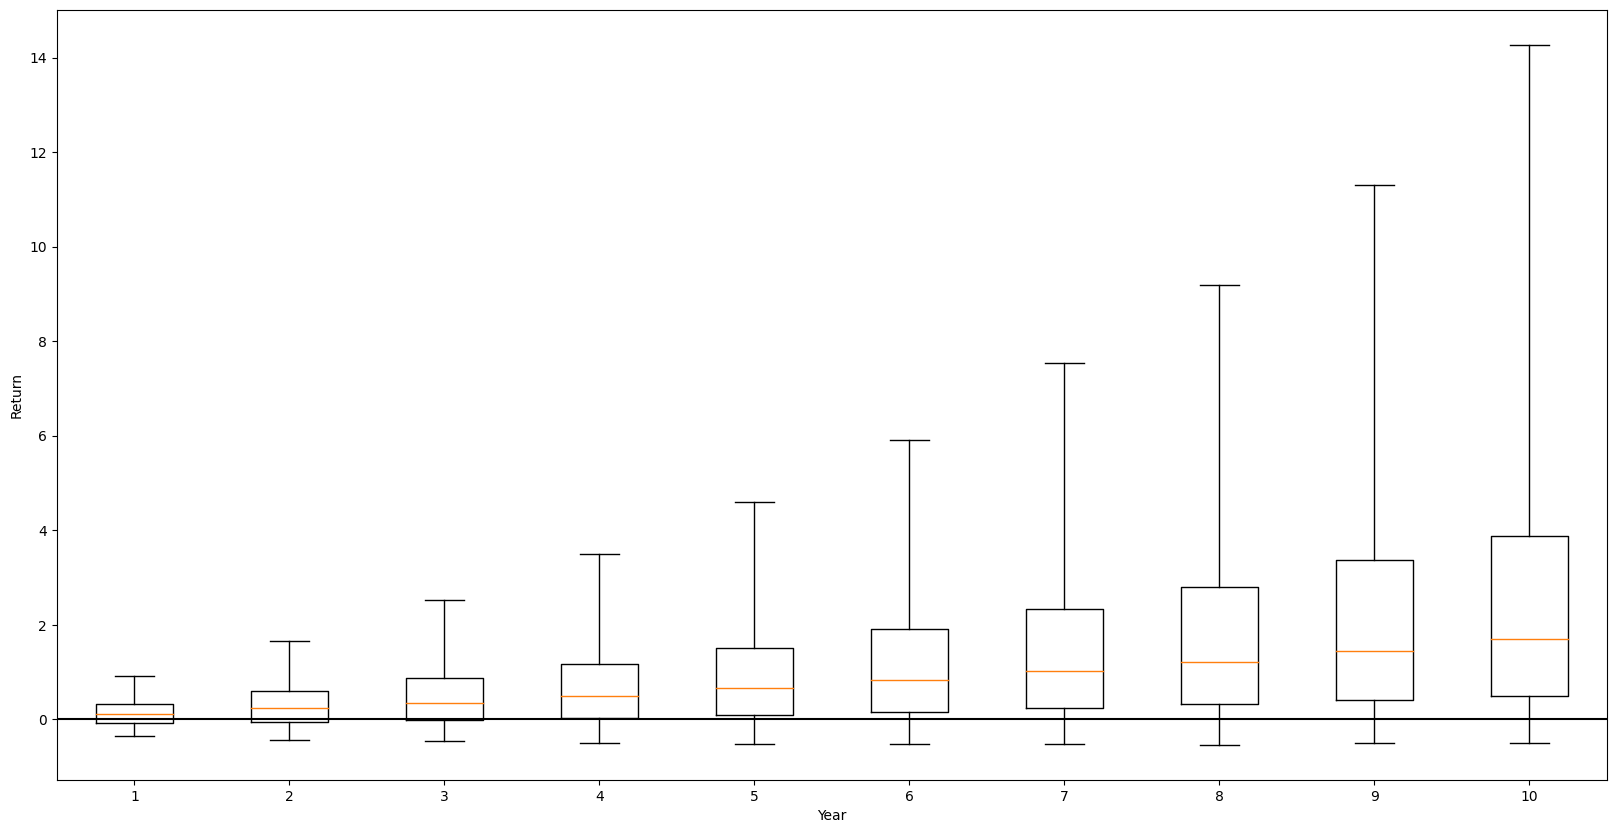

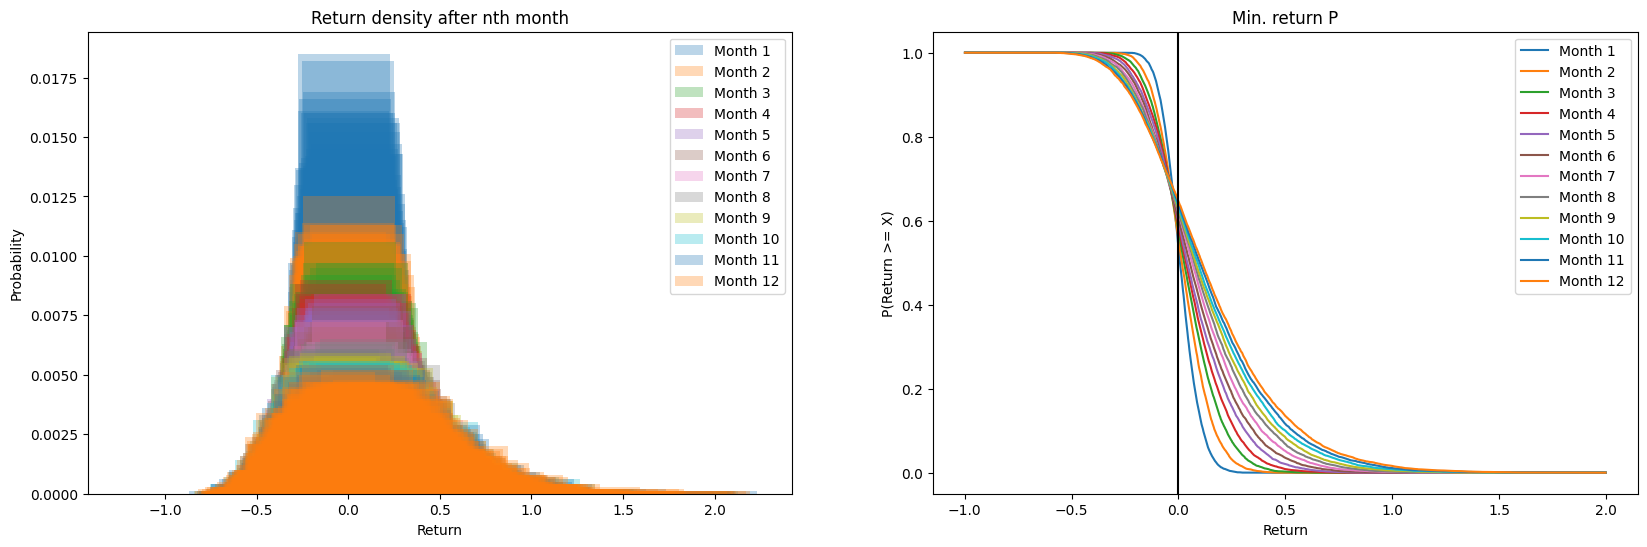

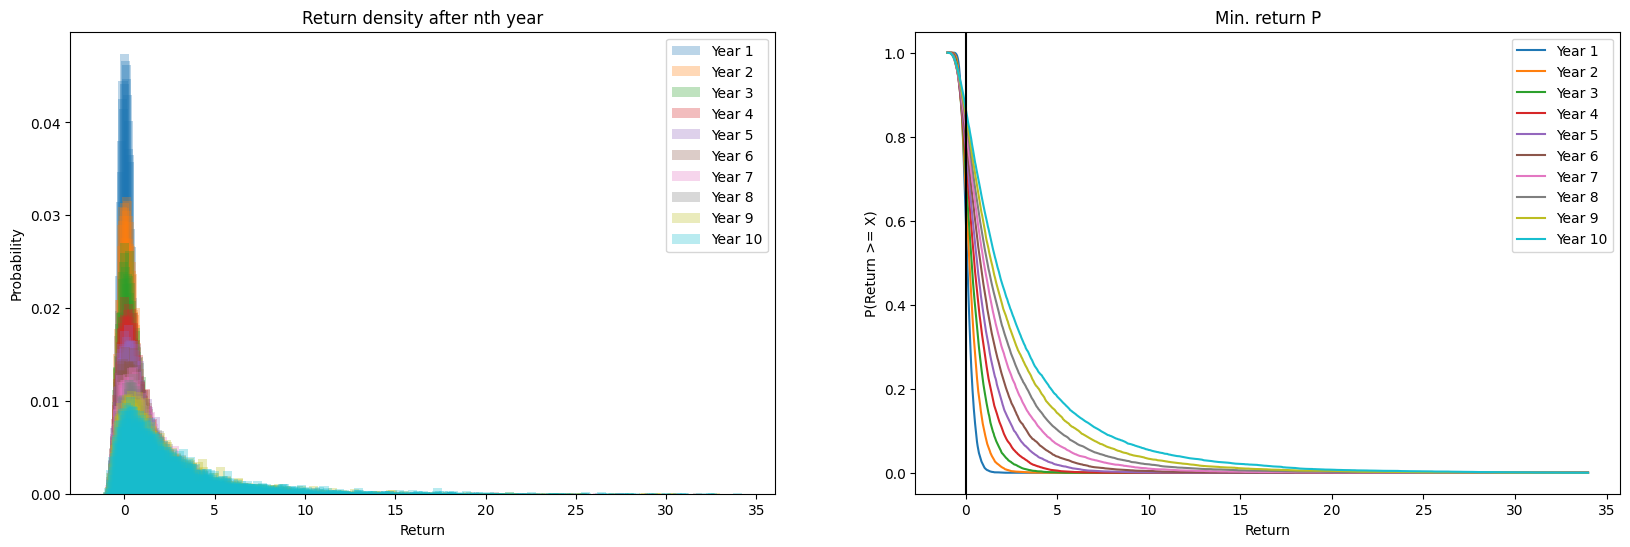

        < 0    > 0   >= 1   >= 2   >= 3   >= 4   >= 5   >= 6   >= 7  >= 8  \
Year                                                                        
1     35.16  64.84   1.68   0.04   0.00   0.00   0.00   0.00   0.00  0.00   
2     29.93  70.07  10.78   1.32   0.22   0.04   0.00   0.00   0.00  0.00   
3     26.59  73.41  20.91   4.75   1.32   0.32   0.09   0.00   0.00  0.00   
4     23.38  76.62  30.43  10.68   4.00   1.50   0.53   0.17   0.07  0.01   
5     20.90  79.10  37.57  16.96   7.78   3.76   1.89   0.98   0.47  0.27   
6     19.10  80.90  44.79  23.43  12.26   6.88   3.91   2.39   1.35  0.89   
7     16.88  83.12  50.42  29.79  18.06  11.02   6.84   4.43   3.08  2.07   
8     15.28  84.72  55.04  35.14  23.10  15.18  10.32   7.20   5.00  3.68   
9     13.79  86.21  59.56  40.34  28.21  20.08  14.29  10.58   7.76  5.86   
10    12.57  87.43  63.66  45.36  32.97  24.12  18.35  14.14  11.08  8.75   

      >= 9  >= 10  
Year               
1     0.00   0.00  
2     0.00   0.

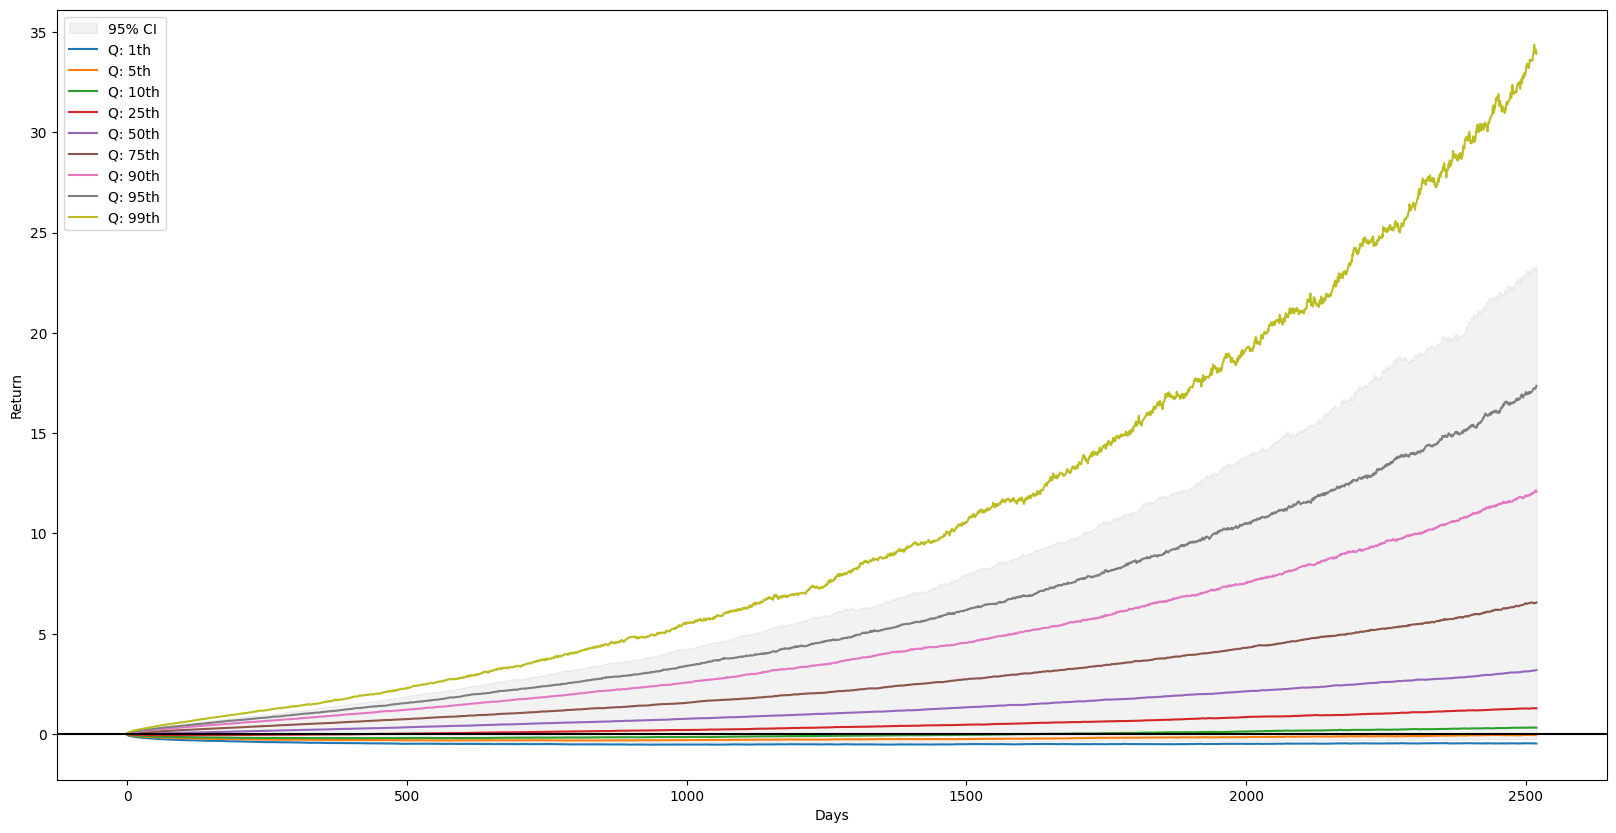

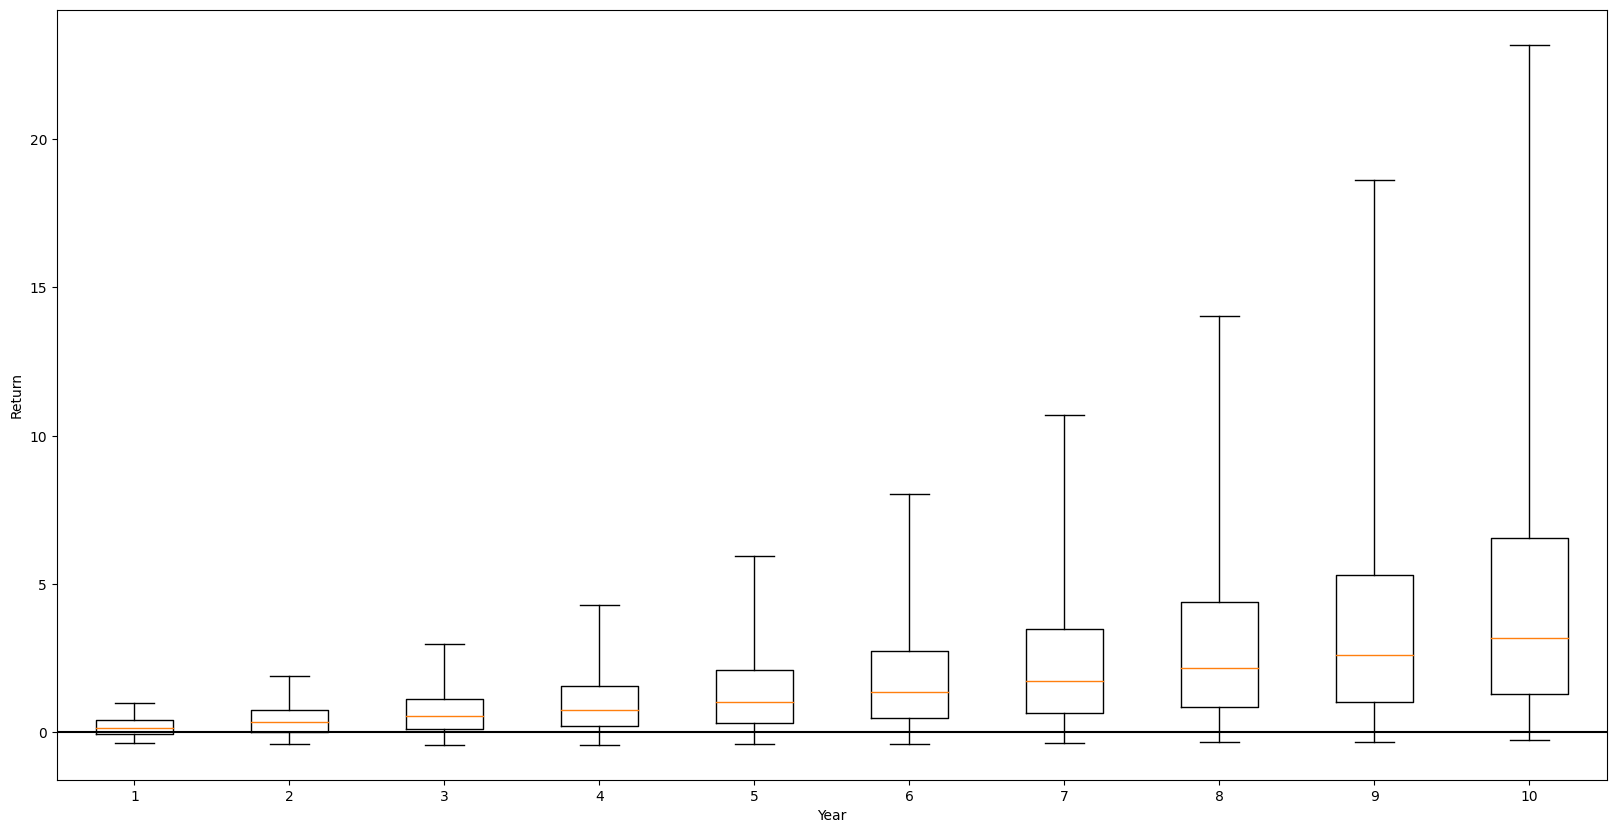

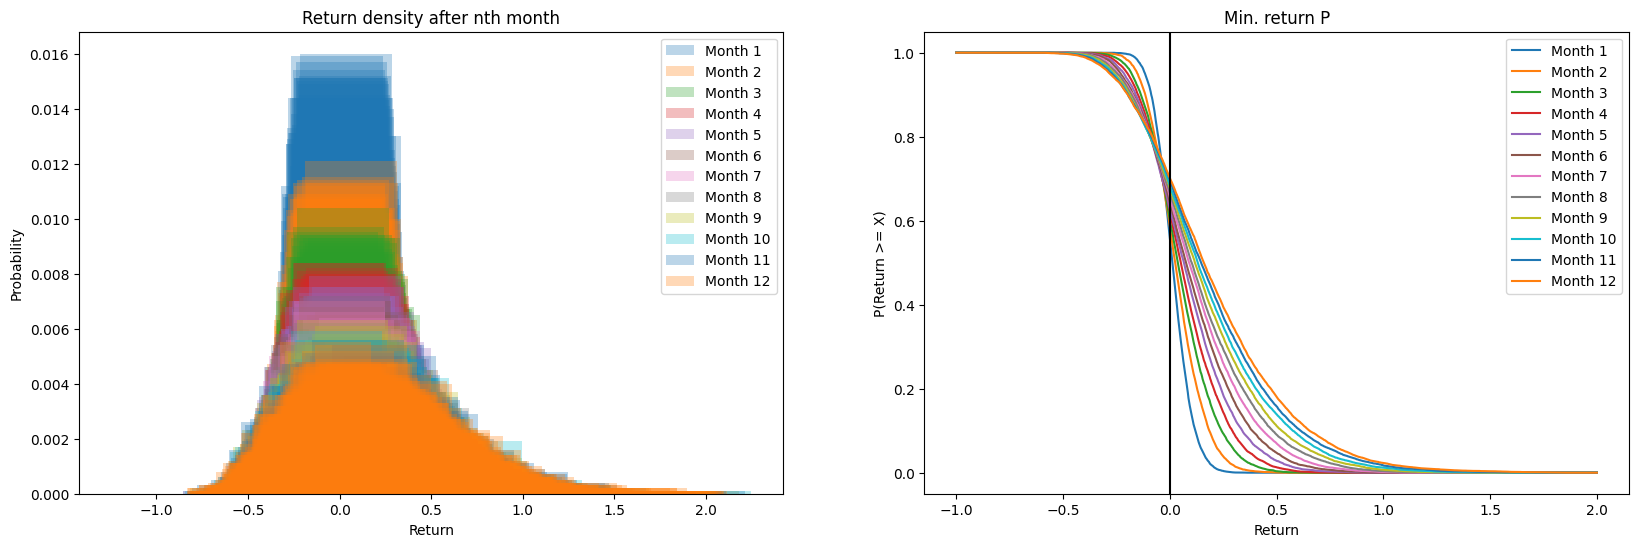

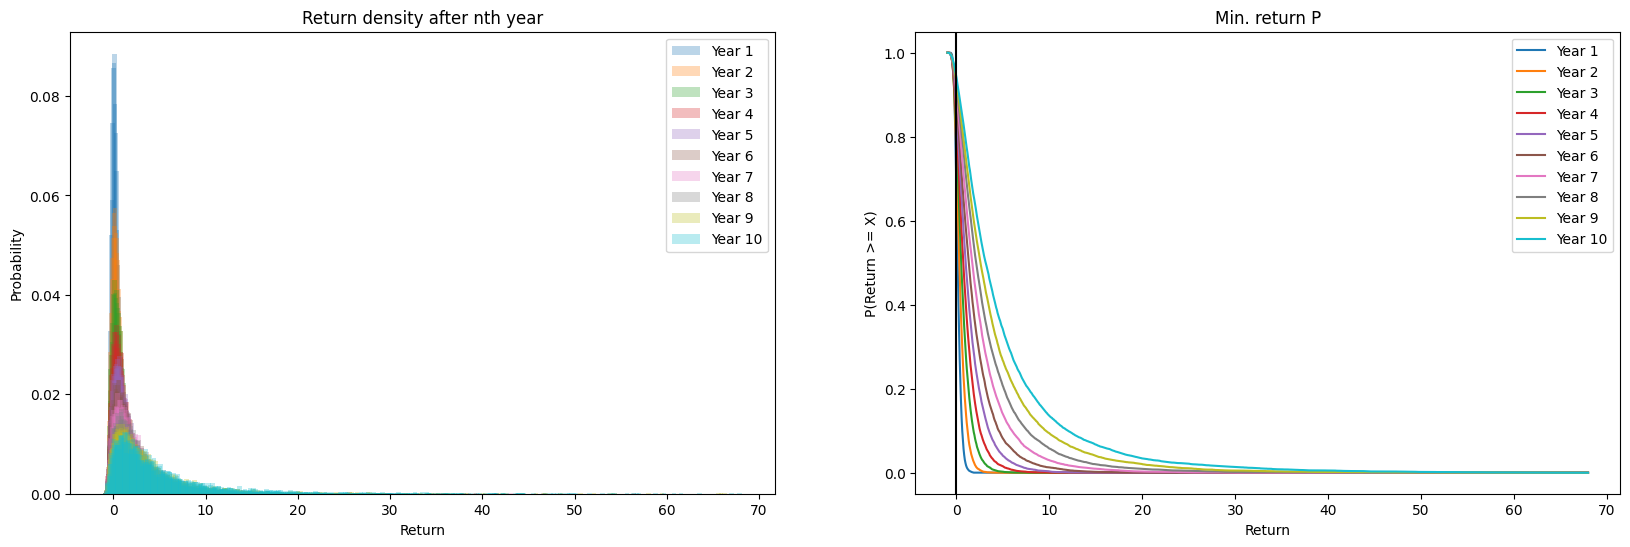

        < 0    > 0   >= 1   >= 2   >= 3   >= 4   >= 5   >= 6   >= 7   >= 8  \
Year                                                                         
1     29.61  70.39   2.34   0.02   0.00   0.00   0.00   0.00   0.00   0.00   
2     23.04  76.96  15.59   1.97   0.21   0.03   0.00   0.00   0.00   0.00   
3     18.93  81.07  29.62   8.46   2.45   0.72   0.25   0.07   0.03   0.01   
4     15.84  84.16  40.96  17.14   7.10   3.08   1.57   0.70   0.32   0.13   
5     12.93  87.07  50.78  26.74  14.28   7.52   4.11   2.47   1.47   0.85   
6     10.99  89.01  59.27  36.16  22.39  13.68   8.26   5.62   3.64   2.53   
7      8.95  91.05  65.97  45.02  30.23  20.39  14.09  10.02   7.14   5.28   
8      7.36  92.64  71.73  52.36  37.93  27.87  20.80  15.39  11.85   9.15   
9      6.38  93.62  75.79  58.53  45.42  34.79  26.85  21.49  17.17  13.84   
10     5.47  94.53  79.49  64.48  51.73  42.12  34.40  27.98  23.00  19.34   

       >= 9  >= 10  
Year                
1      0.00   0.00  


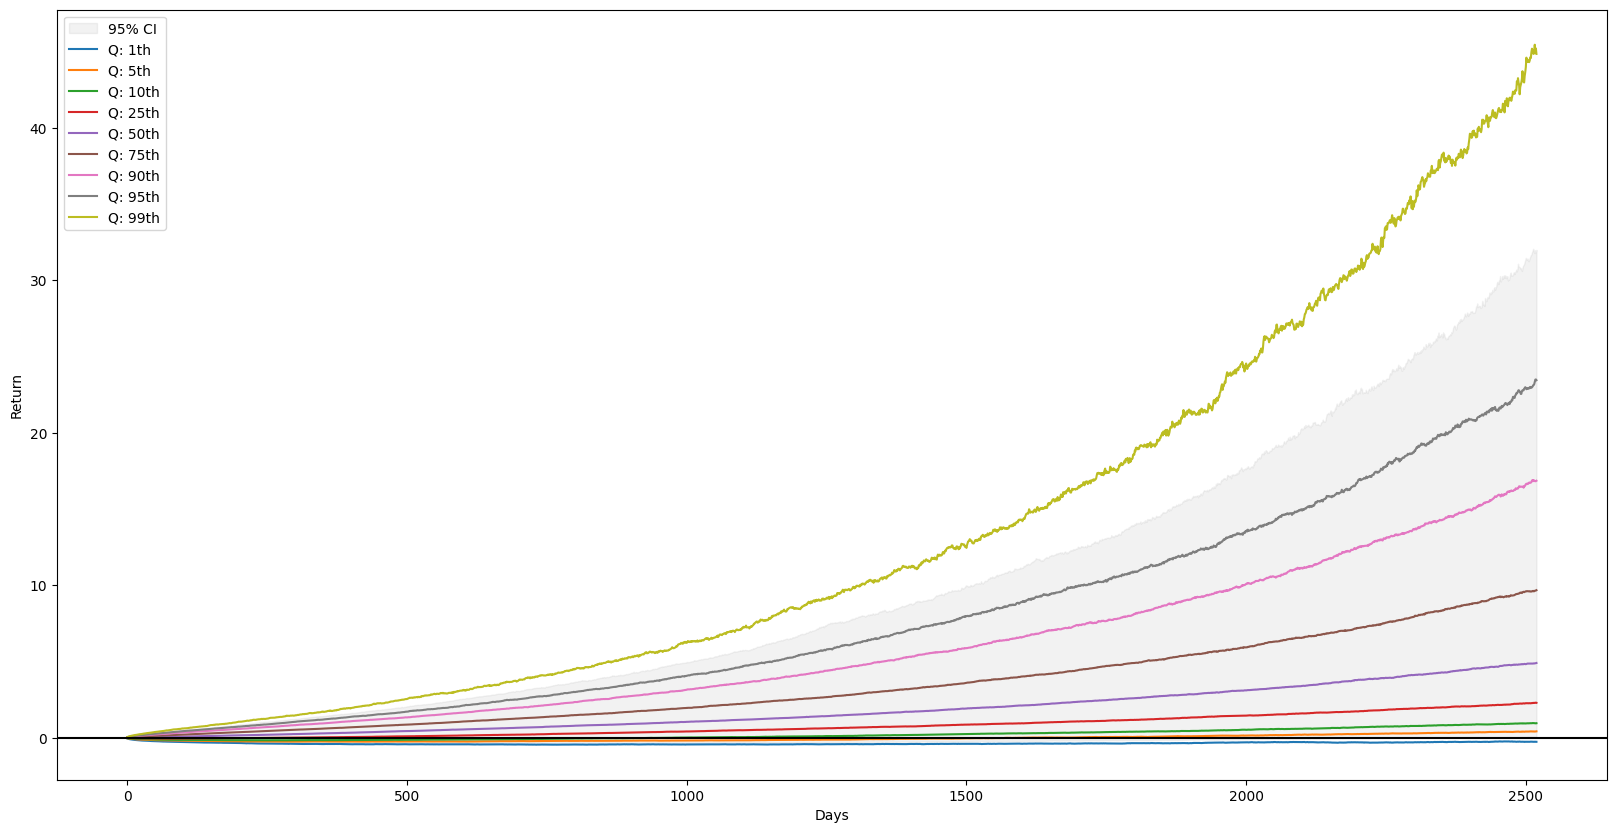

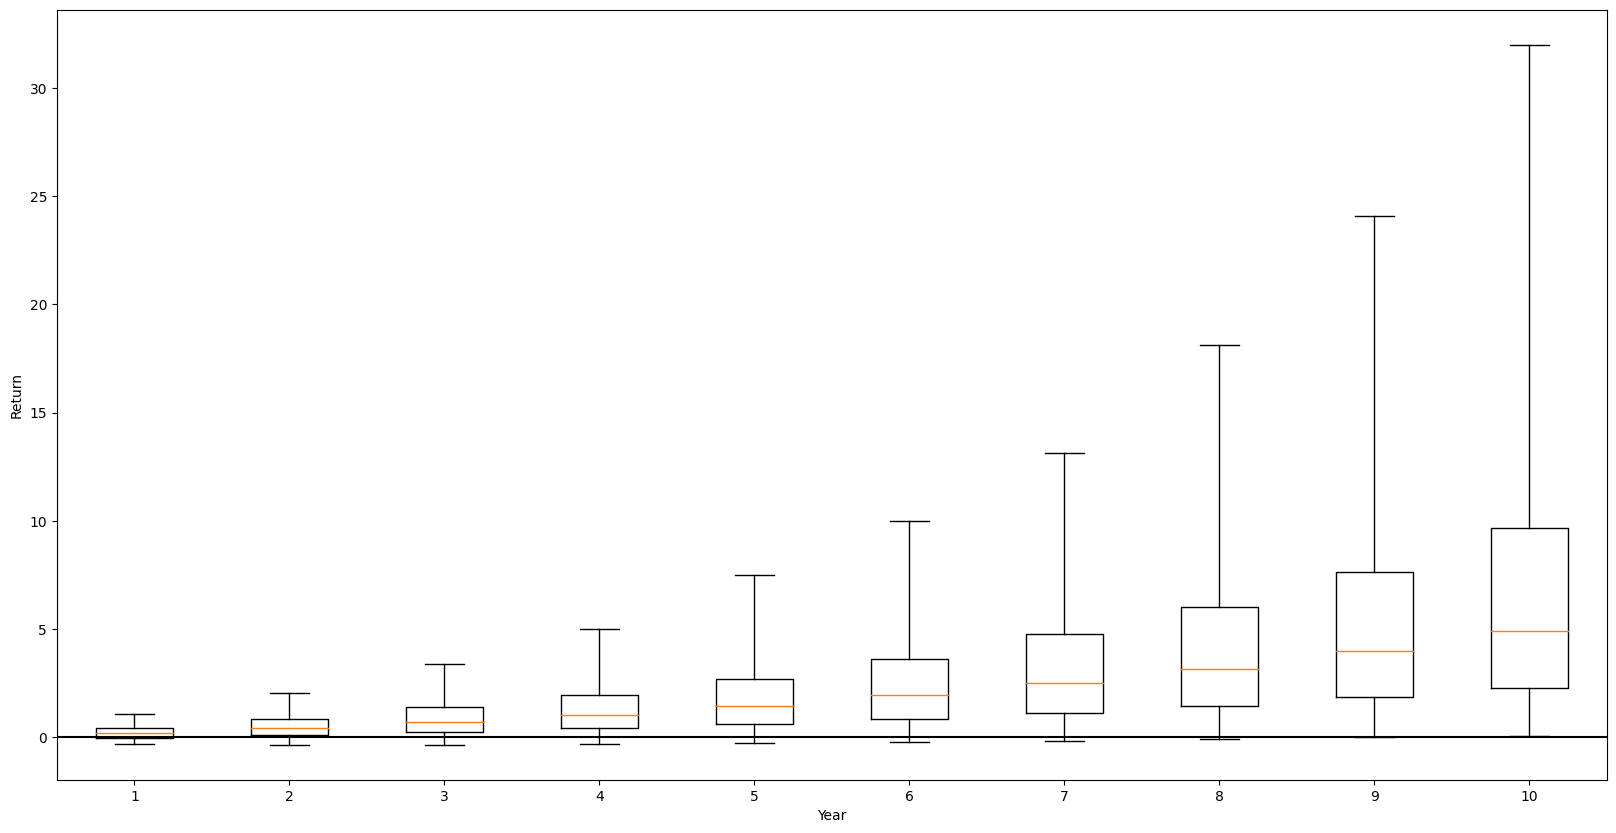

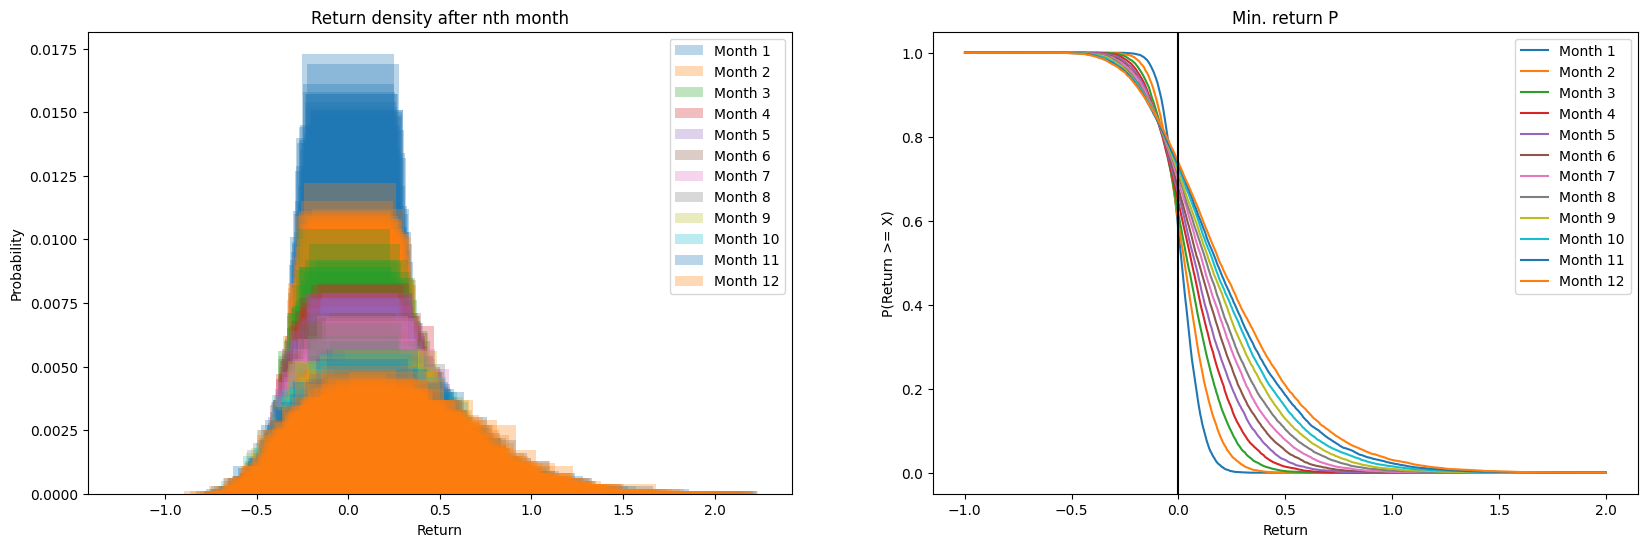

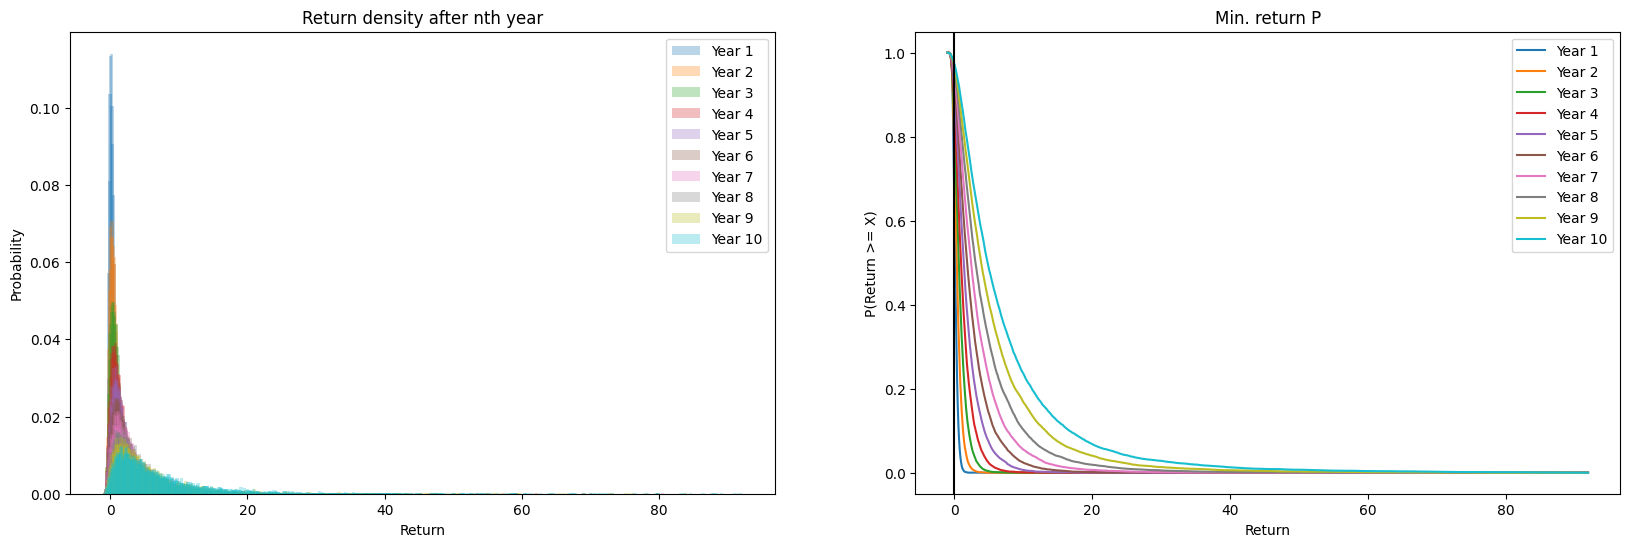

        < 0    > 0   >= 1   >= 2   >= 3   >= 4   >= 5   >= 6   >= 7   >= 8  \
Year                                                                         
1     25.95  74.05   3.10   0.05   0.00   0.00   0.00   0.00   0.00   0.00   
2     18.06  81.94  19.60   2.94   0.52   0.10   0.01   0.00   0.00   0.00   
3     13.10  86.90  38.11  11.93   3.89   1.20   0.40   0.15   0.08   0.02   
4      9.43  90.57  51.94  24.44  11.29   5.40   2.48   1.20   0.60   0.28   
5      7.34  92.66  62.95  36.81  21.39  12.74   7.59   4.64   3.08   1.90   
6      5.55  94.45  71.62  48.75  32.58  21.84  14.58   9.78   7.18   5.09   
7      4.40  95.60  77.89  58.26  42.77  31.27  23.05  16.94  12.44   9.53   
8      3.34  96.66  82.74  66.42  52.01  40.83  32.29  25.13  20.01  16.52   
9      2.52  97.48  86.35  73.24  60.42  49.78  41.19  34.14  28.31  23.39   
10     2.11  97.89  89.48  78.32  67.18  57.88  49.31  42.76  36.80  31.94   

       >= 9  >= 10  
Year                
1      0.00   0.00  


In [14]:
from optfolio.report import *
for label in labels:
    print(f"\n=========={label}=============")
    cum_return = plot_traces(np.array(traces[label]))
    print(returns_table(cum_return))